In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
X_train.shape, y_train.shape         #((samples, x, y, rgb(colour-channel)))

((50000, 32, 32, 3), (50000, 1))

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
X_train[0].shape

(32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

Label	Description:
* 0	airplane
* 1	automobile
* 2	bird
* 3	cat
* 4	deer
* 5	dog
* 6	frog
* 7	horse
* 8	ship
* 9	truck

In [11]:
y_train[0]

array([6], dtype=uint8)

In [20]:
def plot_sample(index):
  plt.figure(figsize=(10,3))
  plt.imshow(X_train[index])

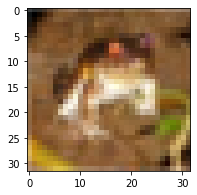

In [21]:
plot_sample(0)

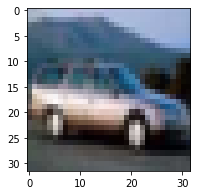

In [22]:
plot_sample(4)

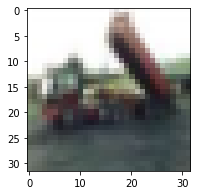

In [23]:
plot_sample(2)

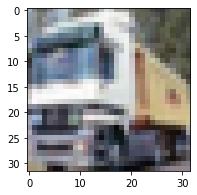

In [24]:
plot_sample(1)

In [25]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

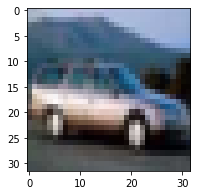

In [26]:
plot_sample(4)

In [27]:
classes[y_train[4][0]]

'automobile'

In [29]:
# Scalling 255
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [30]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [34]:
y_train_categorical = keras.utils.to_categorical(
  y_train, num_classes = 10, dtype="float32"
)

y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [35]:
y_test_categorical = keras.utils.to_categorical(
  y_test, num_classes = 10, dtype="float32"
)

y_test_categorical[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [37]:
# Model building
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="SGD",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8084 - accuracy: 0.3538
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6209 - accuracy: 0.4310
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5386 - accuracy: 0.4563
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4792 - accuracy: 0.4792
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4281 - accuracy: 0.4970
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3875 - accuracy: 0.5091
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3483 - accuracy: 0.5232
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3130 - accuracy: 0.5390
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2813 - accuracy: 0.5500
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.250

In [43]:
classes[y_test[1][0]]

'ship'

In [42]:
classes[np.argmax(model.predict(X_test_scaled)[1])]


'ship'

In [45]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.5635 - accuracy: 0.5599


[1.5635212659835815, 0.5598999857902527]

In [46]:
def get_model():
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(32,32,3)),
      keras.layers.Dense(3000, activation="relu"),
      keras.layers.Dense(1000, activation="relu"),
      keras.layers.Dense(10, activation="sigmoid")
  ])

  model.compile(
      optimizer="SGD",
      loss="categorical_crossentropy",
      metrics=["accuracy"]
  )

  return model

In [47]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 84s 54ms/step - loss: 1.8094 - accuracy: 0.3562
1min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [49]:
%%timeit -n1 -r1
with tf.device("/GPU:0"):
  gpu_model = get_model()
  gpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 6s 4ms/step - loss: 1.8160 - accuracy: 0.3528
6.74 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


%%timeit -n1 -r1
with tf.device("/GPU:0"):
  gpu_model = get_model()
  gpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

### Exercise: GPU performance for fashion mnist dataset

This notebook is derived from a tensorflow tutorial here: https://www.tensorflow.org/tutorials/keras/classification

In [51]:
print(tf.__version__)

2.8.2


In [52]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [54]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [55]:
train_images.shape

(60000, 28, 28)

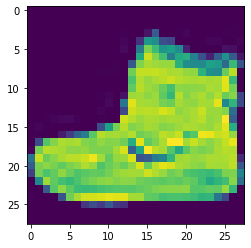

In [56]:
plt.imshow(train_images[0]);

In [58]:
class_names[train_labels[0]]

'Ankle boot'

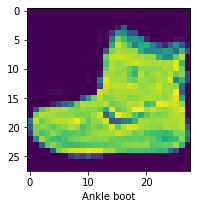

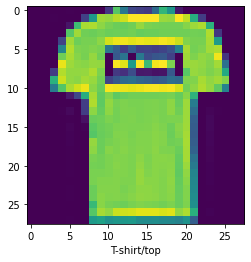

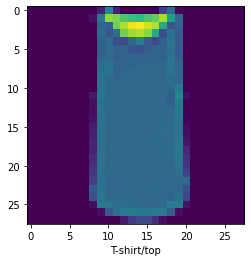

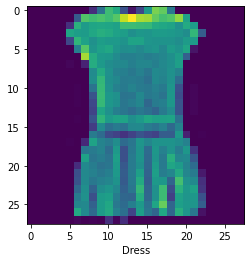

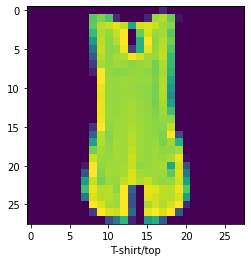

In [59]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [61]:
train_images[5].shape

(28, 28)

In [62]:
# Scalling
train_images_scaled = train_images / 255
test_images_scaled = test_images / 255

In [63]:
train_images_scaled.shape

(60000, 28, 28)

In [77]:
train_labels[0]

9

In [78]:
train_labels.shape

(60000,)

In [64]:
train_images_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [69]:
def get_model(hidden_layers=1):
    # Flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # hidden layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer    
    layers.append(keras.layers.Dense(10, activation='sigmoid'))

    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [70]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4746 - accuracy: 0.8303
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3589 - accuracy: 0.8698
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3215 - accuracy: 0.8800
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2990 - accuracy: 0.8886
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.8959


In [72]:
model.predict(test_images_scaled)[2]

array([1.34747475e-01, 9.99999166e-01, 1.98479960e-04, 3.47358473e-02,
       3.30439443e-03, 5.88546314e-08, 1.78151112e-03, 2.58966030e-15,
       1.69211626e-06, 1.01508695e-08], dtype=float32)

In [73]:
class_names[np.argmax(model.predict(test_images_scaled)[2])]

'Trouser'

In [76]:
class_names[test_labels[2]]

'Trouser'

#### 5 epoch comparison CPU vc GPU

In [79]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
  cpu = get_model(1)
  cpu.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4779 - accuracy: 0.8295
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3598 - accuracy: 0.8680
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3249 - accuracy: 0.8803
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3005 - accuracy: 0.8877
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2817 - accuracy: 0.8941
30.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [80]:
%%timeit -n1 -r1
with tf.device("/GPU:0"):
  gpu = get_model(1)
  gpu.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4734 - accuracy: 0.8311
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3599 - accuracy: 0.8682
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3215 - accuracy: 0.8817
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2981 - accuracy: 0.8902
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2787 - accuracy: 0.8960
20.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [81]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
  cpu = get_model(5)
  cpu.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5163 - accuracy: 0.8147
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3899 - accuracy: 0.8616
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3501 - accuracy: 0.8720
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3273 - accuracy: 0.8826
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3081 - accuracy: 0.8884
1min 54s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [82]:
%%timeit -n1 -r1
with tf.device("/GPU:0"):
  gpu = get_model(5)
  gpu.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5192 - accuracy: 0.8125
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3898 - accuracy: 0.8593
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3534 - accuracy: 0.8726
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3257 - accuracy: 0.8827
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3103 - accuracy: 0.8870
41.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
